# Credit Card Fraud Detecttion 

##### In this project, we wll use machine learning models to identify fraudulent credit card transactions.

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [5]:
import warnings
warnings.filterwarnings("ignore")
# Cross validation
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Scaling and power transformation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
# Model Building
from sklearn.linear_model import LogisticRegression
# Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [6]:
df = pd.read_csv("C:\coding\cardfraud\creditcard.csv")

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#observe the different features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset comprises 284,807 entries and 30 numerical features, including the target variable.
There are no missing values present in the dataset.

 The distribution of our classes

In [9]:
classes= df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Percentage of Non-fradulent transaction = ", round(normal_share,3), "%")
print("Percentage of Fradulent transaction = ", round(fraud_share,3), "%")

Percentage of Non-fradulent transaction =  99.827 %
Percentage of Fradulent transaction =  0.173 %


Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations


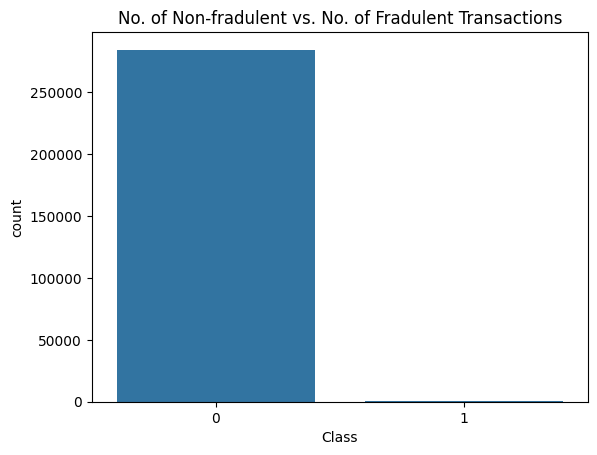

In [10]:
sns.countplot(x='Class', data=df) 
plt.title("No. of Non-fradulent vs. No. of Fradulent Transactions")
plt.show()

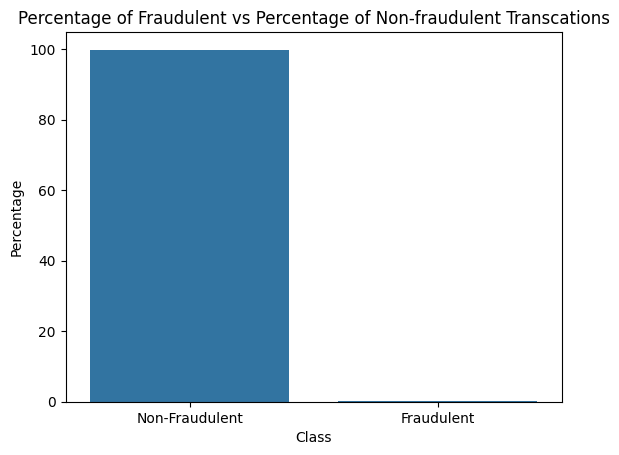

In [11]:
fraud_percentage = pd.DataFrame({'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}) 
sns.barplot(x='Class',y='Percentage', data=fraud_percentage)
plt.title('Percentage of Fraudulent vs Percentage of Non-fraudulent Transcations')
plt.show()

Number and percentage of Fradulent transactions are very less in comparision to non-fradulent transactions that shows that this dataset is highly imbalanced.

Create a scatter plot to observe the distribution of classes with time

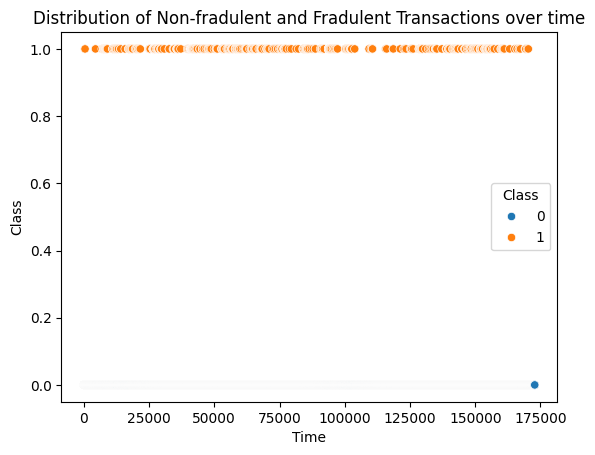

In [12]:
sns.scatterplot(x='Time', y='Class',hue="Class", data=df)
plt.title("Distribution of Non-fradulent and Fradulent Transactions over time")
plt.show()

From the graph we anaylize that there is no specific trend in Time for fradulent and non-fradulent transactions.

Create a scatter plot to observe the distribution of classes with Amount

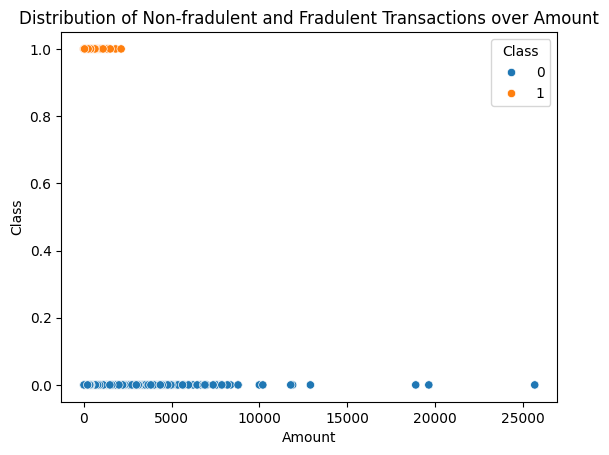

In [13]:
sns.scatterplot(x='Amount', y='Class',hue='Class',data=df)
plt.title("Distribution of Non-fradulent and Fradulent Transactions over Amount")
plt.show()

Fradulent transactions are more likely to have small "Amount" than Non-fradulent transactions.

Drop unnecessary columns because no specific pattern wrt for Fradulent and Non-fradulent transactions over time.

In [14]:
df.drop('Time', axis=1, inplace=True)

## Splitting the data into train & test data

In [15]:
y = df['Class']
X = df.drop('Class', axis=1)

In [16]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=101)

Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


Feature Scaling has to be performed before applying PCA.Since V1, V2,..., V28 features are obtained from PCA, Feature scaling is skipped for those.Feature Scaling is applied only to 'Amount'.

In [18]:
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

Plotting the distribution of a variable

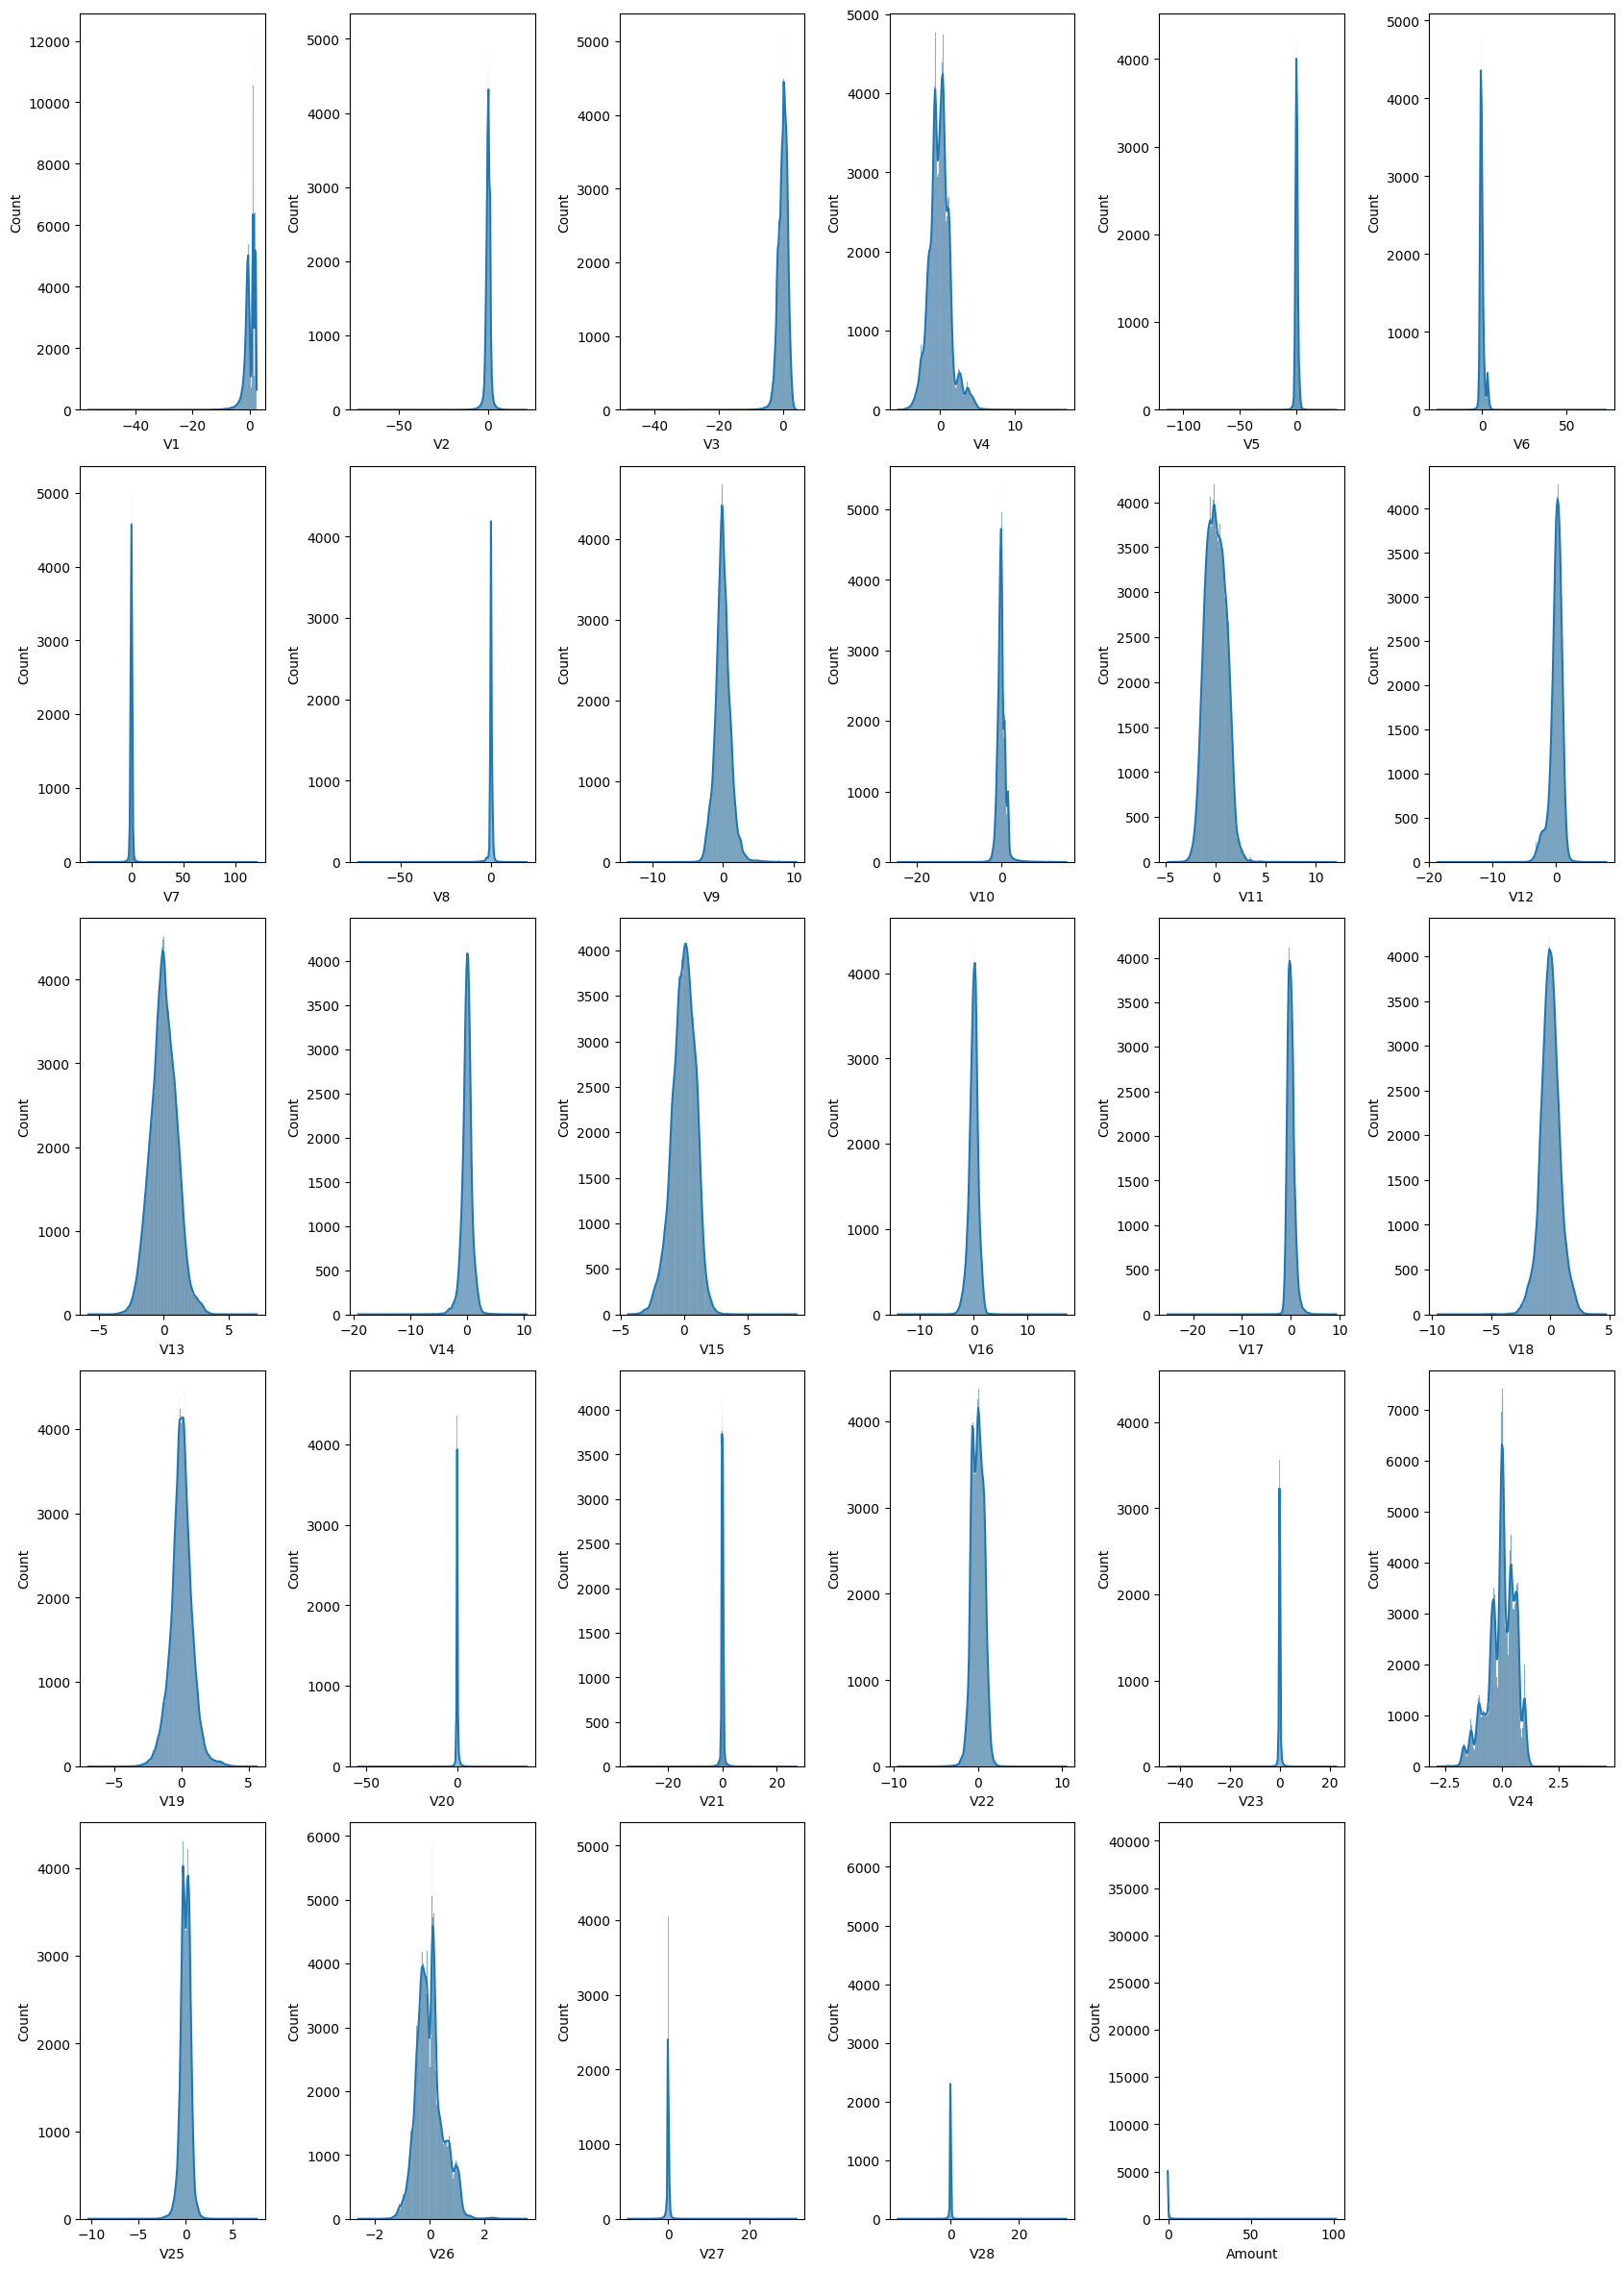

In [19]:
plt.figure(figsize=(17,28))
for i, col in enumerate(X_train.columns):
  plt.subplot(6, 6, i+1)    
  sns.histplot(X_train[col], kde=True)
  plt.tight_layout()

Skewness is present in most of the features.

If there is skewness present in the distribution use:
'Power Transformer' package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [20]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train.loc[:,:] = pt.fit_transform(X_train)
X_test.loc[:,:] = pt.transform(X_test)

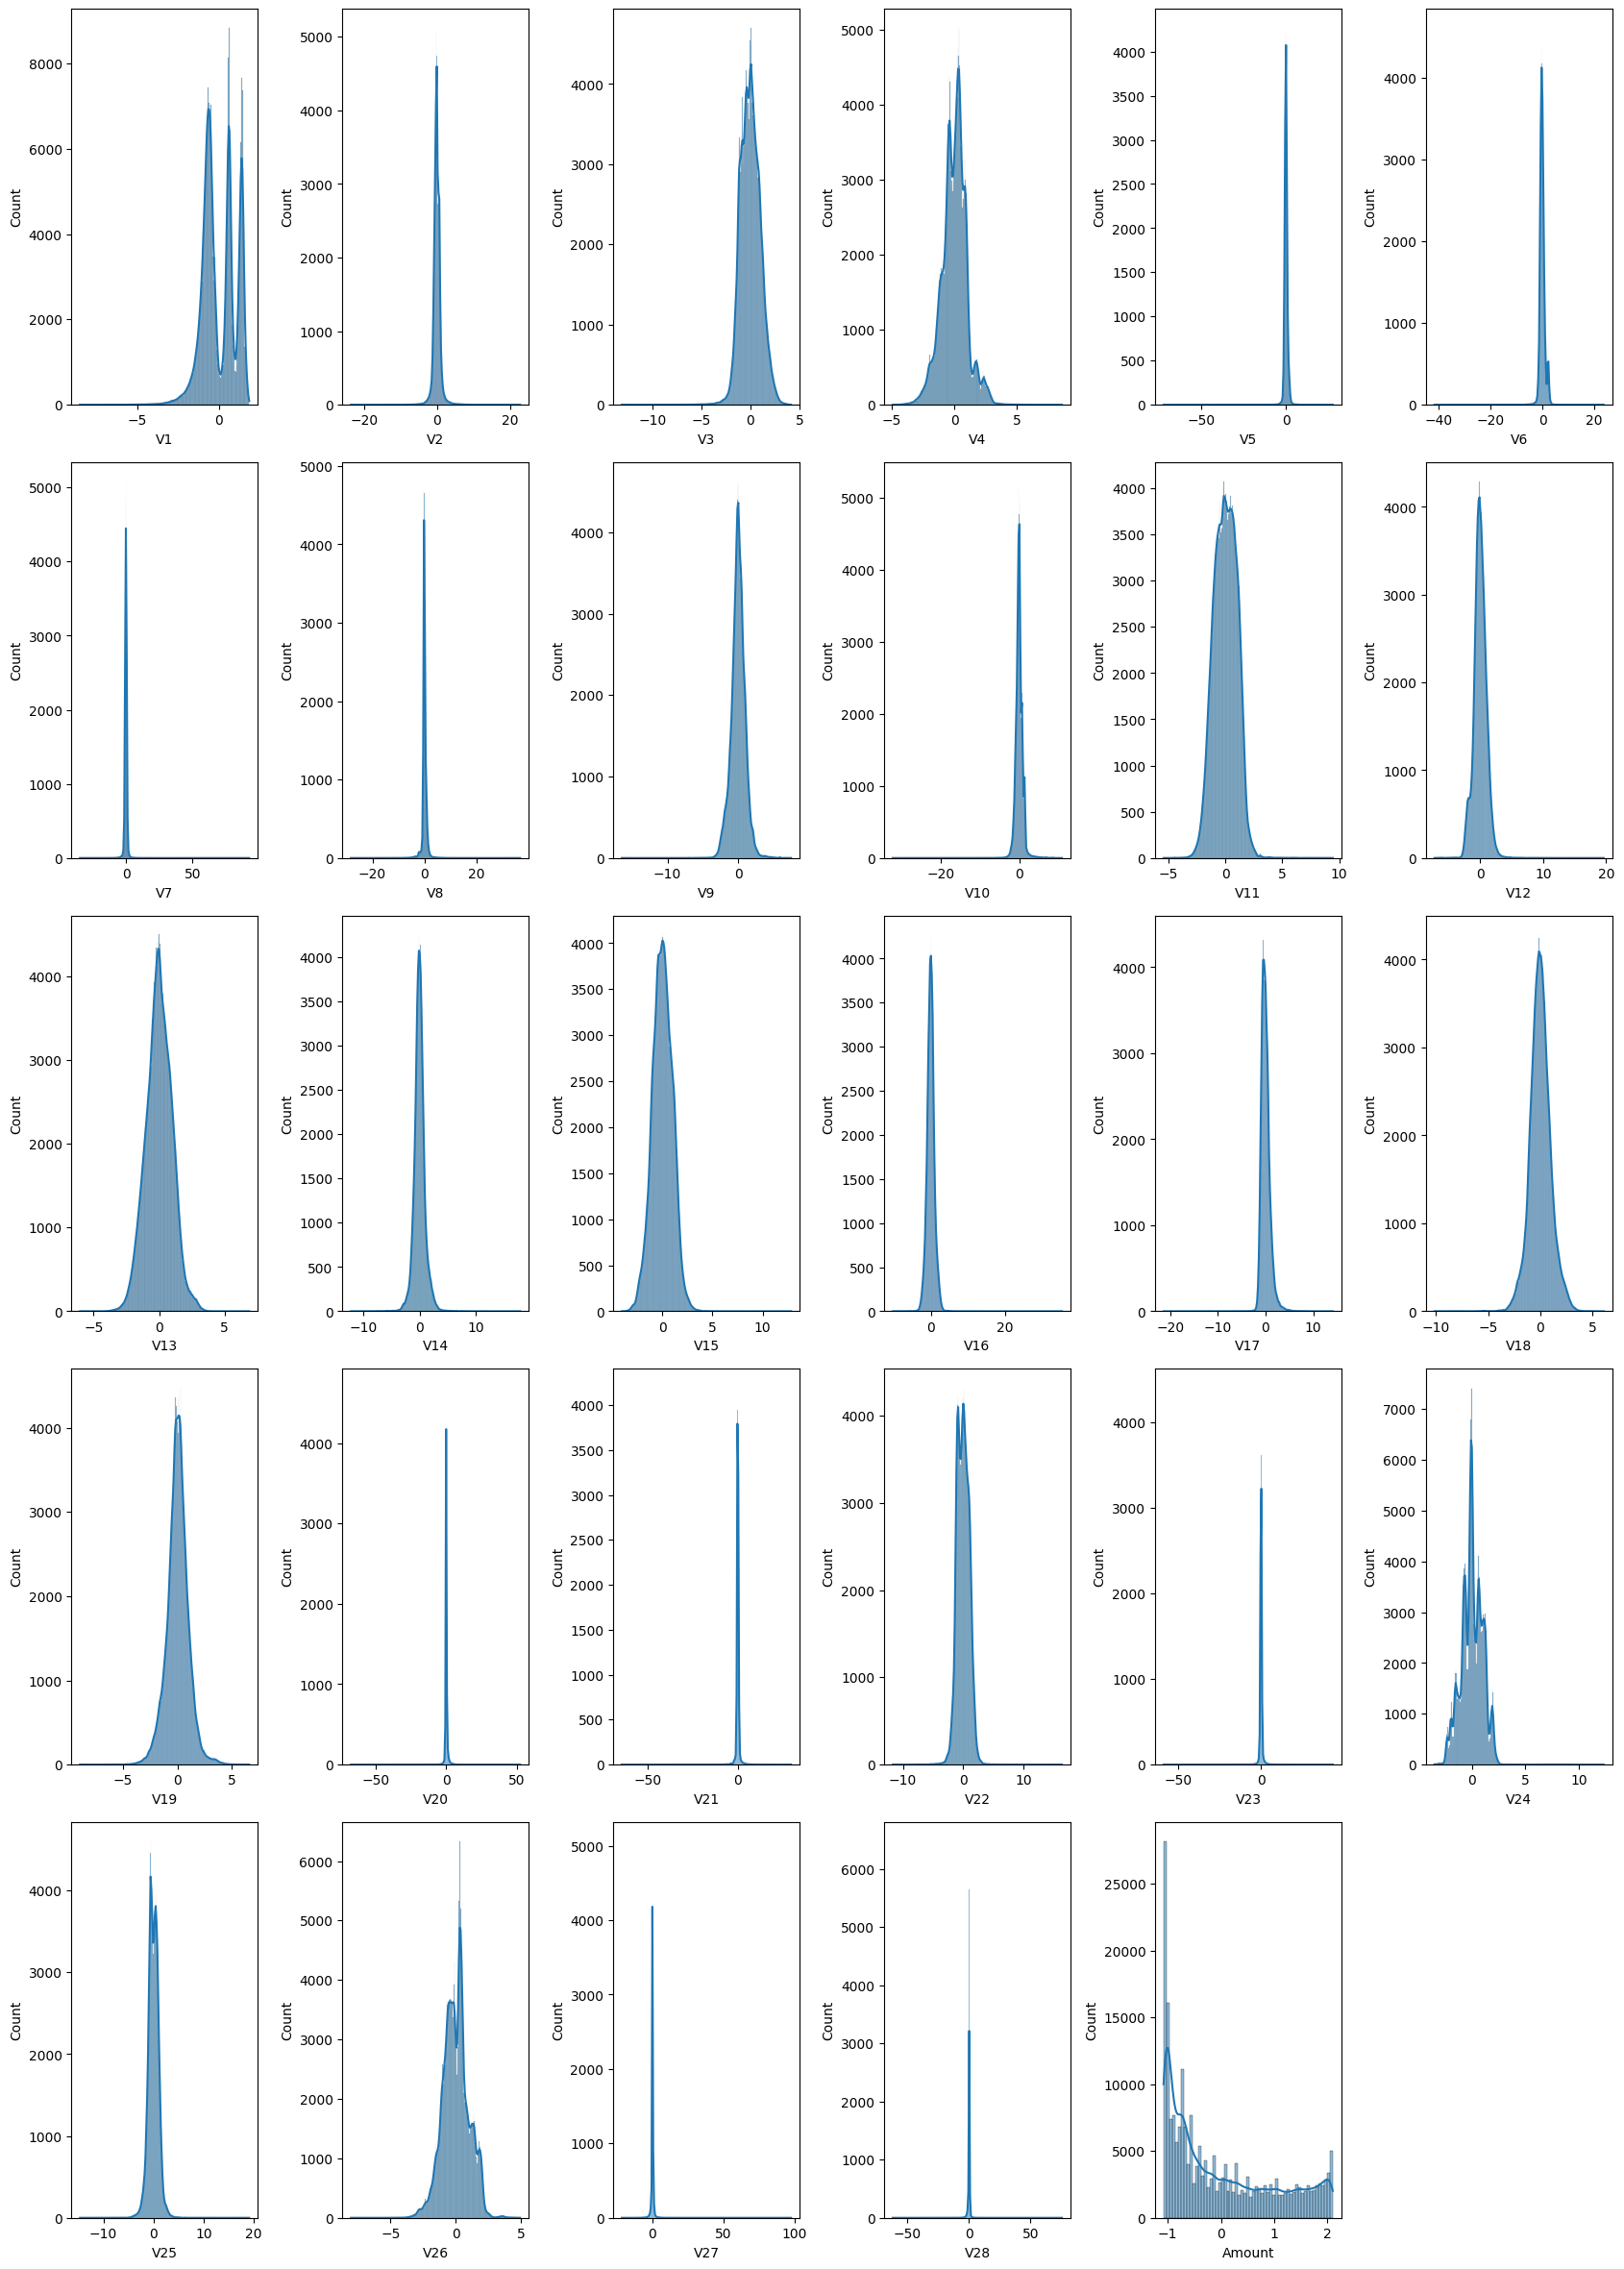

In [21]:
plt.figure(figsize=(17,28))
for i, col in enumerate(X_train.columns):
  plt.subplot(6, 6, i+1)    
  sns.histplot(X_train[col], kde=True)
  plt.tight_layout()

## Model Building

In [22]:
def build_model_with_cv(estimator, param_grid, cv, X_train, y_train, X_test, scoring='roc_auc'):
    model_cv = GridSearchCV(estimator = estimator,
                            param_grid = param_grid, 
                            scoring= scoring, 
                            cv = cv, 
                            verbose = 1,
                            return_train_score=True)
    # Fit the model
    model_cv.fit(X_train, y_train)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    
    best_model = model_cv.best_estimator_
    best_score = model_cv.best_score_
    best_params = model_cv.best_params_
    print("Best parameters obtained by cross validation : ", best_params)

    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)

    return y_test_pred, best_score, cv_results

eval_df = pd.DataFrame(columns=["Model Name", "Accuracy Score", "Sensitivity Score", "F1 Score", "ROC-AUC Score"])

def evaluate_model(y_true, y_pred, eval_df, roc_auc_sc, model_name="Not specified"):
    confusion = metrics.confusion_matrix(y_true, y_pred)
    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 

    accuracy_sc = metrics.accuracy_score(y_true, y_pred)
    sensitivity_score = TP / float(TP+FN)
    print("Classification Report : \n", classification_report(y_true, y_pred))

    eval_df = eval_df.append({"Model Name":model_name,
                              "Accuracy Score":accuracy_sc,
                              "Sensitivity Score":sensitivity_score,
                              "F1 Score":f1_score(y_true, y_pred),
                              "ROC-AUC Score":roc_auc_sc}, ignore_index=True)
    return eval_df

In [23]:
from sklearn import linear_model 

num_C = [0.01, 0.1, 1, 10, 100, 1000] 
cv_num = []  

In [24]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = model_selection.train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=101)
print(X_train_cv.shape)
print(X_test_cv.shape)
print(y_train_cv.shape, np.sum(y_train_cv))
print(y_test_cv.shape, np.sum(y_test_cv))

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=47)

(182276, 29)
(45569, 29)
(182276,) 315
(45569,) 79


In [25]:
params = {"C": num_C}
y_test_pred, roc_auc_sc, cross_validation_results = build_model_with_cv(LogisticRegression(), params, folds, X_train_cv, y_train_cv, X_test_cv, scoring='roc_auc')
cross_validation_results

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters obtained by cross validation :  {'C': 0.01}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.242741,0.017036,0.025653,0.002172,0.01,{'C': 0.01},0.983101,0.972710,0.980720,0.978844,0.004445,1,0.982404,0.985992,0.986343,0.984913,0.001780
1,0.259981,0.011754,0.026023,0.000989,0.10,{'C': 0.1},0.981265,0.974998,0.976599,0.977621,0.002659,2,0.982025,0.985467,0.986632,0.984708,0.001956
2,0.259780,0.003235,0.024532,0.000188,1.00,{'C': 1},0.980267,0.975528,0.975600,0.977132,0.002217,3,0.981707,0.985109,0.986378,0.984398,0.001972
3,0.287189,0.045156,0.026879,0.003001,10.00,{'C': 10},0.980145,0.974909,0.975557,0.976870,0.002331,4,0.981673,0.985157,0.986370,0.984400,0.001991
4,0.375625,0.020828,0.036959,0.000682,100.00,{'C': 100},0.980134,0.974908,0.975542,0.976861,0.002329,5,0.981669,0.985151,0.986368,0.984396,0.001991
5,0.381139,0.027853,0.037929,0.002738,1000.00,{'C': 1000},0.980134,0.974907,0.975541,0.976861,0.002329,6,0.981668,0.985150,0.986367,0.984395,0.001991


Mean ROC_AUC_score for different values of C : 0    0.978844
1    0.977621
2    0.977132
3    0.976870
4    0.976861
5    0.976861
Name: mean_test_score, dtype: float64


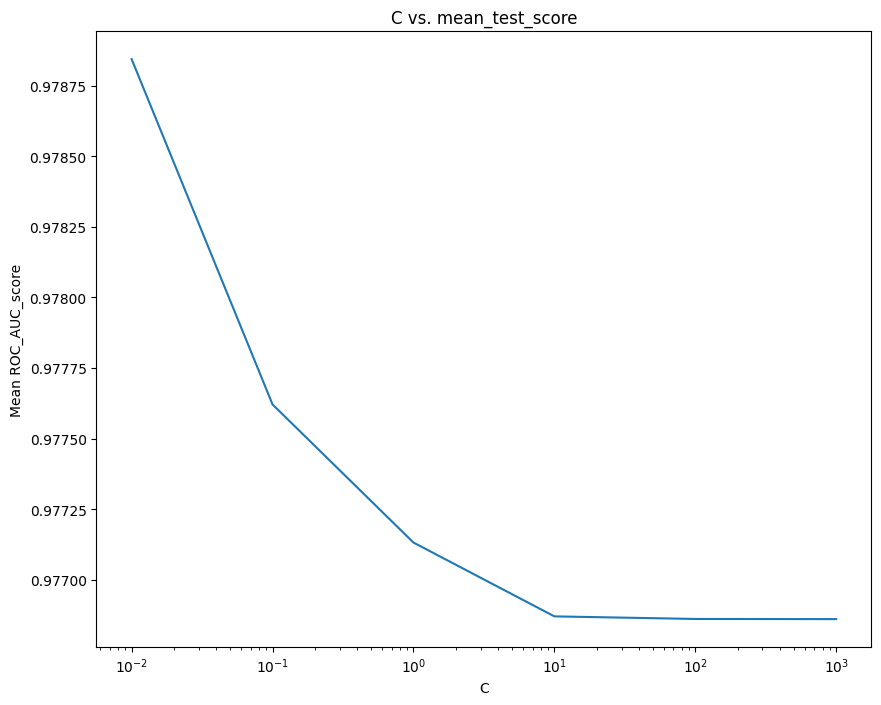

In [26]:
cv_num = cross_validation_results['mean_test_score']
print("Mean ROC_AUC_score for different values of C :", cv_num)

plt.figure(figsize=(10, 8))
plt.plot(cross_validation_results['param_C'], cross_validation_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Mean ROC_AUC_score')
plt.xscale('log')
plt.title('C vs. mean_test_score')
plt.show()

In [28]:
def evaluate_model(y_true, y_pred, eval_df, roc_auc_sc, model_name):
    TP = sum((y_true == 1) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    accuracy_sc = metrics.accuracy_score(y_true, y_pred)
    sensitivity_score = TP / float(TP + FN)
    print("Classification Report : \n", classification_report(y_true, y_pred))

    new_row = pd.DataFrame([{
        "Model Name": model_name,
        "Accuracy Score": accuracy_sc,
        "Sensitivity Score": sensitivity_score,
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC Score": roc_auc_sc
    }])

    eval_df = pd.concat([eval_df, new_row], ignore_index=True)
    return eval_df

In [29]:
eval_df = evaluate_model(y_test_cv, y_test_pred, eval_df, round(roc_auc_sc, 5), 'logistic_on_imbalanced')
print(eval_df)  

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.90      0.70      0.79        79

    accuracy                           1.00     45569
   macro avg       0.95      0.85      0.89     45569
weighted avg       1.00      1.00      1.00     45569

               Model Name  Accuracy Score  Sensitivity Score  F1 Score  \
0  logistic_on_imbalanced        0.999342           0.696203  0.785714   

  ROC-AUC Score  ROC AUC Score  
0           NaN        0.97884  


### Classification Report 

At first glance, our model seems to do an amazing job it got over 99% accuracy! But when we look a little deeper, things get more interesting. Most of the data belongs to one category (label 0), and our model is really good at recognizing that. However, there’s a much smaller group (label 1), and that’s where it struggles a bit.

Out of all the actual label 1 cases, the model correctly found only about 70% of them. So while it’s great at spotting the common cases, it misses some of the rare ones. That’s important to know especially in real-life situations where catching those rare cases could really matter (like detecting fraud or disease).

Still, the model does a decent job overall, and the ROC-AUC score of 0.97 tells us it can tell the difference between the two groups pretty well. But we might need to improve things further by giving more attention to the less common group  maybe by balancing the data or tweaking how the model learns.